# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<br/>
<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

<br/>
<br/>

<center><i><b>
Atenção: não são autorizadas cópias, divulgações ou qualquer tipo de uso deste material sem o consentimento prévio dos autores.
</center></i></b>

# <center> Exercício - Análise de Componentes Principais </center>

Neste exercício, você implementará o método de análise de componentes principais (PCA) e verá como ele pode ser eficientemente empregado para realizar a redução automática da dimensionalidade da base de dados. Antes de começar este exercício, é recomendável que você revise os conceitos apresentados em aula.

Instruções
----------

Este arquivo contém o código que auxiliará no desenvolvimento do exercício. Você precisará completar as seguintes funções:

* `pca()`
* `projetarDados()`
* `reconstruirDados()`

Você não poderá criar nenhuma outra função. Apenas altere as rotinas fornecidas.

## Parte 1: Visualização dos dados

Inicialmente, será usada uma base de dados pequena para facilitar a visualização. 

Vamos carregar a base de dados. 

In [1]:
# -*- coding: utf-8 -*-

# Caminho dos arquivos
FILES_DIRECTORY = "dados"

import numpy as np # biblioteca usada para trabalhar com vetores e matrizes
import pandas as pd # biblioteca usada para trabalhar com dataframes
import os #importa a biblioteca para tarefas relacionadas ao sistema operacional
import matplotlib.pyplot as plt # biblioteca usada para gerar os gráficos

# importa o arquivo e guarda em um dataframe do Pandas
df_dataset = pd.read_csv( os.path.join(FILES_DIRECTORY, 'exDados.csv'), sep=',', index_col=None)

print('Dados carregados com sucesso!')

Dados carregados com sucesso!


Agora, vamos dar uma olhada nas 6 primeiras amostras da base de dados.

In [2]:
# vamos usar a função display para imprimir o dataframe 
# também poderíamos ter usado a função print(df_dataset.head(n=6))
display(df_dataset.head(n=6))

,f1,f2
0,3.381563,3.389113
1,4.527875,5.854178
2,2.655682,4.411995
3,2.765235,3.715414
4,2.846560,4.175506
5,3.890672,6.488381


Vamos guardar os dados dentro de uma matriz.

In [3]:
# pega os valores das n-1 primeiras colunas e guarda em uma matrix X
X = df_dataset.values 

# imprime as 5 primeiras linhas da matriz X
display('X:', X[0:5,:])

'X:'

array([[3.38156267, 3.38911268],
       [4.52787538, 5.8541781 ],
       [2.65568187, 4.41199472],
       [2.76523467, 3.71541365],
       [2.84656011, 4.17550645]])

Vamos plotar os dados.

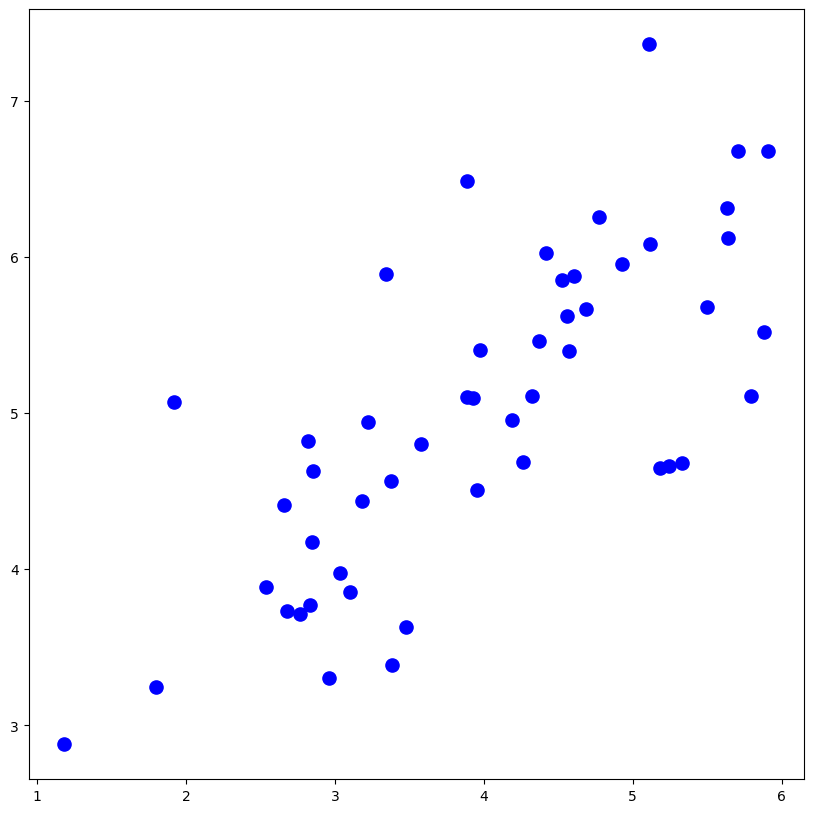

In [4]:
# define o tamanho da figura 
plt.figure(figsize=(10,10))

# plota os dados
plt.scatter( X[:,0], X[:,1], marker='o', label = 'Dados', color='blue', s=90) 

# mostra o gráfico
plt.show()

## Parte 2: Análise de Componentes Principais

Nesta parte do exercício, você precisará implementar o PCA. Porém, é importante primeiro normalizar os dados. No *script* abaixo, a função `normalizar()` será usada para isso, fazendo com que todos as atributos passem a ter média zero e desvio padrão igual à um.

In [5]:
def normalizar(X):
    """
    Normaliza os atributos em X
    """
    
    m, n = X.shape # m = qtde de objetos e n = qtde de atributos
    
    # incializa as variaves de saida
    X_norm = np.zeros( (m,n) )
    
    # media 
    mu = np.mean(X, axis=0)
    
    # desvio padrao
    sigma = np.std(X, axis=0, ddof=1)
    
    for i in range(m):
        X_norm[i,:] = (X[i,:]-mu) / sigma
        
    return X_norm, mu, sigma

# chama a função para normalizar X
X_norm, media, desvio = normalizar(X)

print('Normalização realizada com sucesso!')

Normalização realizada com sucesso!


O primeiro passo para a implementação do PCA é calcular a matriz covariância dos dados que é dada por:

$$\Sigma = \frac{1}{m}X^{T}X$$

sendo $X$ a matriz de dados com amostras em linhas, e $m$ a quantidade de exemplos. Note que $\Sigma$ é uma matriz $n \times n$.

Após o cálculo da matriz de covariância, você pode usar a decomposição em valores singulares (SVD - *singular value decomposition*) para computar os componentes principais. No Python, o SVD pode ser calculado pela função `numpy.linalg.svd`. Essa função retornará os autovetores $U_1, U_2, \ldots, U_n$, que correspondem aos componentes principais de $\Sigma$. Ela retornará também os autovalores de $\Sigma$.

Agora, você deverá completar a função que executa o PCA. 

In [12]:
def pca(X):
    """
    Executa a analise de componentes principais na base de dados X

    Retorna os autovetores U e os autovalores em S.
    """

    m, n = X.shape # m = qtde de objetos e n = qtde de atributos
    
    # inicializa as variaves de saida
    U = np.zeros( [n,n] ) # autovetores
    S = np.zeros( n )  # autovalores   
    
    ########################## COMPLETE O CÓDIGO AQUI  ########################
    #  Instrucoes: você precisa calcular a matriz de covariancia de X e,
    #                posteriormente, usar a função svd para calcular os 
    #                autovetores e autovalores da matriz encontrada.
    #
    #                A funcao devera retornar os autovalores e autovetores
    #                calculados pela funcao np.linalg.svd  

    matriz_cov = np.dot(X.T, X) / m

    U, S, _ = np.linalg.svd(matriz_cov)

    ########################################################################## 

    return U, S 


# executa o PCA
U, S = pca(X_norm)

print('\nPrimeiro autovetor:\n U[:,0] = [%1.6f, %1.6f] \n' %(U[0,0], U[1,0]))
print('Segundo autovetor:\n U[:,1] = [%1.6f, %1.6f] \n' %(U[0,1], U[1,1]))
print('Autovalores: = %1.6f e %1.6f\n' %(S[0],S[1]))

print('Se o PCA estiver correto:\n\t- o primeiro autovetor deverá ser igual a [-0.707107, -0.707107])')
print('\t- o segundo autovetor deverá ser igual a [-0.707107, 0.707107])')
print('\t- os autovalores deverão ser 1.700820 e 0.0.259180\n')


Primeiro autovetor:
 U[:,0] = [-0.707107, -0.707107] 

Segundo autovetor:
 U[:,1] = [-0.707107, 0.707107] 

Autovalores: = 1.700820 e 0.259180

Se o PCA estiver correto:
	- o primeiro autovetor deverá ser igual a [-0.707107, -0.707107])
	- o segundo autovetor deverá ser igual a [-0.707107, 0.707107])
	- os autovalores deverão ser 1.700820 e 0.0.259180



Agora, vamos plotar os autovetores centralizados. As linhas indicam as direções de máxima variação na base de dados.

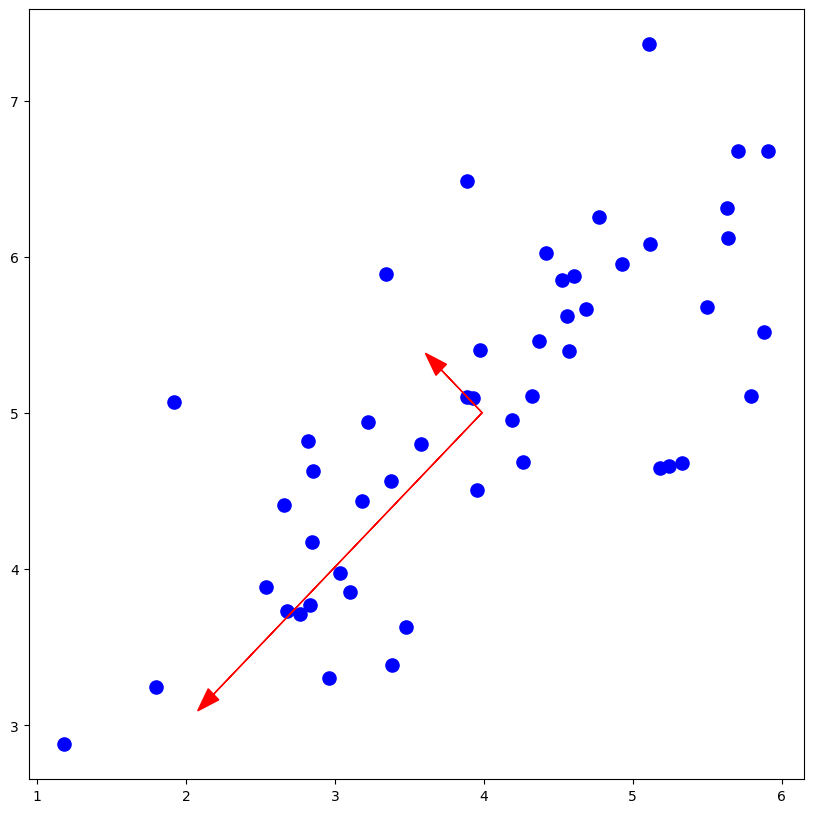

In [13]:
# define o tamanho da figura 
plt.figure(figsize=(10,10))

# plota os dados
plt.scatter( X[:,0], X[:,1], marker='o', label = 'Dados', color='blue', s=90) 

# plota o primeiro autovetor centralizado 
plt.arrow( x=media[0], y=media[1], dx=1.5 * S[0] * U[0, 0], dy=1.5 * S[0] * U[1, 0], head_width=0.10, color='red')

# plota o segundo autovetor centralizado   
plt.arrow( x=media[0], y=media[1], dx=1.5 * S[1] * U[0, 1], dy=1.5 * S[1] * U[1, 1], head_width=0.10, color='red') 

# mostra o gráfico
plt.show()

Vamos analisar a porcentagem de variância que cada componente preserva. 

In [14]:
porc = S/(np.sum(S))

print('Porcentagem de variância preservada pelo primeiro componente: %1.2f%%' %(porc[0]*100))
print('Porcentagem de variância preservada pelo segundo componente: %1.2f%%' %(porc[1]*100))

Porcentagem de variância preservada pelo primeiro componente: 86.78%
Porcentagem de variância preservada pelo segundo componente: 13.22%


## Parte 3: Redução de Dimensionalidade

Após computar os componentes principais, você pode usá-los para reduzir a dimensão dos atributos do conjunto de dados, projetando cada exemplo em um espaço dimensional menor, $x^{(i)} \rightarrow z^{(i)}$ (por exemplo, projetando os dados de 2D para 1D). Nesta parte do exercício, você precisará usar os autovetores computados pelo PCA e projetar as amostras em um espaço de uma dimensão.

Na prática, se você estivesse usando um algoritmo de aprendizado de máquina, você poderia usar os dados projetados ao invés dos dados originais. Com isso, você pode treinar seu modelo mais rapidamente, pois haveria bem menos dimensões nos dados de entrada.

Complete a função `projetarDados()` para realizar a projeção dos dados usando os primeiros $k$ autovetores.

In [15]:
def projetarDados(X, U, K): 
    """
    Computa a representacao reduzida pela projecao usando os K
    primeiros autovetores
    
    Calcula a projecao dos dados X em um espaco
    de dimensao reduzida gerado pelas primeiras K colunas de
    U. A funcao retorna os exemplos projetados em Z.
    """

    # incializa a variavel de saida
    Z = np.zeros( [X.shape[0],K] )   

    ########################## COMPLETE O CÓDIGO AQUI  ########################
    #  Instrucoes: você precisa computar a projecao dos dados usando apenas os 
    #                primeiros K autovetores em U. 
    # 

    Z = np.dot(X, U[:, :K])

    ##########################################################################

    return Z

# projeta os dadados na dimensao K
K = 1
Z = projetarDados(X_norm, U, K)

print('Projeção da primeira amostra: %1.6f\n' %Z[0])
print('(É esperado um valor aproximadamente igual a 1.481)\n\n')

Projeção da primeira amostra: 1.481274

(É esperado um valor aproximadamente igual a 1.481)




Após projetar os dados em um espaço dimensional menor, é possível recuperar uma aproximação projetando-os de volta para o espaço original. Agora, sua tarefa é completar a função `reconstruirDados()` para projetar cada amostra de $Z$ de volta para o espaço original e retornar a aproximação reconstruída em $X_{rec}$.

In [17]:
def reconstruirDados(Z, U, K): 
    """
    Calcula uma aproximacao do dado original usando o dado projetado
    
    Computa uma aproximacao do dado original que foi reduzido para 
    K dimensoes. A funcao retorna a reconstrucao aproximada em X_rec
    """

    # incializa a variavel de saida
    X_rec = np.zeros( [Z.shape[0], U.shape[0]] ) 

    ########################## COMPLETE O CÓDIGO AQUI  ########################
    #  Instrucoes: você precisa computar a aproximacao do dado pela projecao 
    #                reversa no espaco original usando os K primeiros 
    #                autovetores em U. 
    # 

    X_rec = np.dot(Z, U[:, :K].T)
    
    ########################################################################## 

    return X_rec

# projeta os dadados na dimensao K
K = 1
X_rec = reconstruirDados(Z, U, K)    

print('Aproximação da primeira amostra: [%1.6f, %1.6f]\n' %(X_rec[0,0],X_rec[0,1]))
print('(É esperado um valor aproximadamente igual a [-1.047 -1.047])\n\n')

Aproximação da primeira amostra: [-1.047419, -1.047419]

(É esperado um valor aproximadamente igual a [-1.047 -1.047])




A seguir, vamos observar a diferença entre os dados originais normalizados e os dados reconstruídos após o PCA.

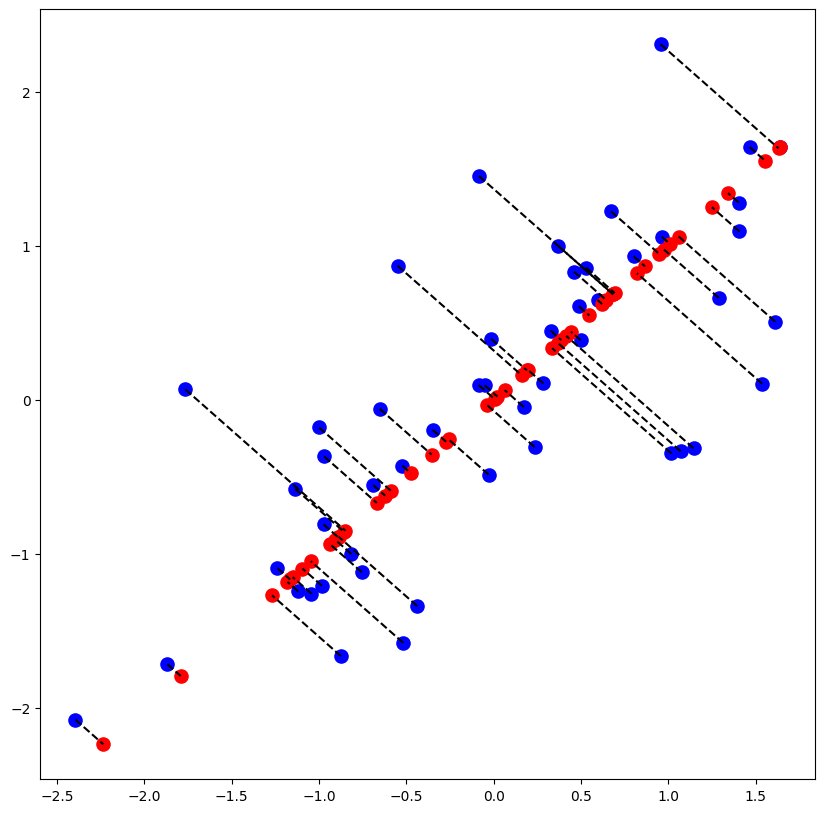

In [18]:
# define o tamanho da figura 
plt.figure(figsize=(10,10))

# plota os dados originais normalizados
plt.scatter( X_norm[:,0], X_norm[:,1], marker='o', color='blue', s=90) 

# plota linhas conectando os pontos reconstruídos aos pontos originais
plt.scatter( X_rec[:,0], X_rec[:,1], marker='o', color='red', s=90)
for i in range( X_norm.shape[0] ):
    plt.plot( [X_norm[i,0],X_rec[i,0]], [X_norm[i,1],X_rec[i,1]], linestyle='--', color='black') 

# mostra o gráfico
plt.show()

No gráfico acima, os círculos azuis representam os dados originais normalizados, enquanto que os círculos vermelhos indicam os dados reconstruídos após o PCA. A projeção efetivamente só mantém as informações na direção dada por $U_1$.

Para analisar numericamente a diferença entre os dados, vamos imprimir a tabela de valores originais, normalizados, projetados e reconstruídos.

In [19]:
# impressao de tabela de valores originais, normalizados, projetados e reconstruidos
print('i \t Original (X) \t\t Normalizado (X_norm) \t Projetado (Z) \t Reconstruido (X_rec)\n')
print('- \t ------------ \t\t -------------------- \t ------------- \t --------------------\n')
for i in range( X.shape[0]):
    print('%d \t [%f %f] \t [%f %f] \t [%f] \t [%f %f]\n' %(i, X[i,0], X[i,1], X_norm[i,0], X_norm[i,1], Z[i], X_rec[i,0], X_rec[i,1]))   

i 	 Original (X) 		 Normalizado (X_norm) 	 Projetado (Z) 	 Reconstruido (X_rec)

- 	 ------------ 		 -------------------- 	 ------------- 	 --------------------

0 	 [3.381563 3.389113] 	 [-0.518054 -1.576784] 	 [1.481274] 	 [-1.047419 -1.047419]

1 	 [4.527875 5.854178] 	 [0.459154 0.831899] 	 [-0.912912] 	 [0.645526 0.645526]

2 	 [2.655682 4.411995] 	 [-1.136851 -0.577298] 	 [1.212087] 	 [-0.857075 -0.857075]

3 	 [2.765235 3.715414] 	 [-1.043460 -1.257946] 	 [1.627340] 	 [-1.150703 -1.150703]

4 	 [2.846560 4.175506] 	 [-0.974132 -0.808377] 	 [1.260424] 	 [-0.891254 -0.891254]

5 	 [3.890672 6.488381] 	 [-0.084049 1.451596] 	 [-0.967002] 	 [0.683774 0.683774]

6 	 [3.475805 3.632849] 	 [-0.437714 -1.338623] 	 [1.256060] 	 [-0.888168 -0.888168]

7 	 [5.911298 6.680769] 	 [1.638492 1.639584] 	 [-2.317950] 	 [1.639038 1.639038]

8 	 [3.928894 5.098447] 	 [-0.051465 0.093453] 	 [-0.029690] 	 [0.020994 0.020994]

9 	 [4.561835 5.623299] 	 [0.488104 0.606301] 	 [-0.773861] 	 [0.547203 0.

## Parte 4: Aplicação do PCA em um conjunto de imagens faciais

Nesta parte do exercício, o PCA será aplicado para comprimir amostras de imagens faciais armazenadas no arquivo `exFaces.csv`. O conjunto de dados contém 5.000 amostras representadas por imagens $32 \times 32$ em escala de cinza (vetor linha com 1.024 atributos). 


Vamos carregar essa base de dados e guardar os dados dentro de uma matriz.

In [20]:
# importa o arquivo e guarda em um dataframe do Pandas
df_dataset2 = pd.read_csv( os.path.join(FILES_DIRECTORY, 'exFaces.csv'), sep=',', header=None)

# pega os valores das n-1 primeiras colunas e guarda em uma matrix X
X2 = df_dataset2.values 

print('Dados carregados com sucesso!')

Dados carregados com sucesso!


Vamos exibir as primeiras 100 faces da base.

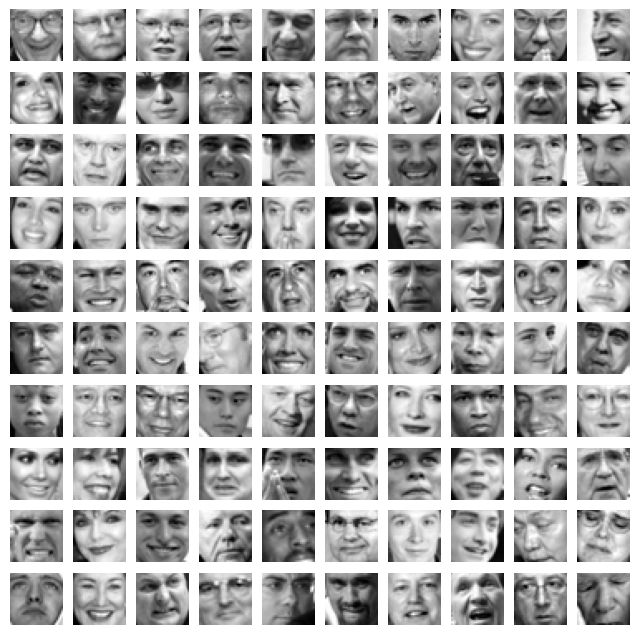

In [21]:
def visualizaImagem(X):
    
    example_width = int(round(np.sqrt(X.shape[1])) )

    # calcula numero de linhas e colunas
    m, n = X.shape
    example_height = int(n / example_width)

    # calcula numero de itens que serao exibidos
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, axs = plt.subplots(display_rows,display_cols, figsize=(8, 8))
                        
    for ax, i in zip(axs.ravel(), range( X.shape[0] )):   
        new_X = np.reshape( np.ravel(X[i,:]), (example_width, example_height) )

        ax.imshow(new_X.T, cmap='gray')
        ax.axis('off')

    
    plt.show()
    
visualizaImagem(X2[0:100,:])

## Parte 5: Componentes Principais usando o PCA

No *script* abaixo, os dados serão normalizados e o PCA será executado. É importante observar que cada componente principal em $U$ (cada linha) é um vetor de comprimento $n$ (sendo que para o conjunto de dados faciais, $n = 1024$). Esses componentes podem ser visualizados pela remodelação de cada um deles usando a matriz $32 \times 32$, correspondente aos pixels do conjunto de dados original. Em seguida, os primeiros 36 componentes principais são apresentados. Neste ponto, é possível alterar o código para exibir mais componentes principais para ver como eles capturam os principais traços de cada imagem.

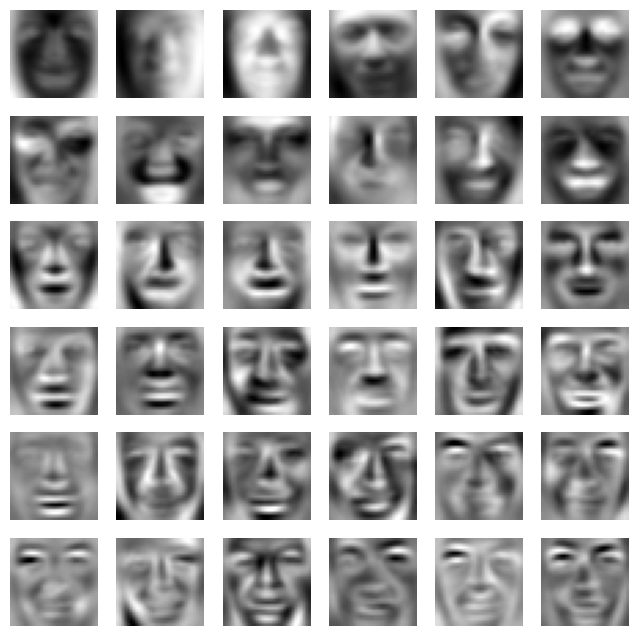

In [22]:
# normaliza os dados
X2_norm, media2, desvio2 = normalizar(X2)

# executa o PCA
U2, S2 = pca(X2_norm)

# plota os 36 componentes principais
visualizaImagem( U2[:,0:36].T )

## Parte 6: Redução de dimensionalidade das imagens

Uma vez que os componentes principais foram computados, eles podem ser empregados para reduzir a dimensionalidade do conjunto de dados. Isso permite que algum algoritmo de aprendizado seja aplicado sob uma entrada de tamanho menor (por exemplo, 100 dimensões) ao invés da original de 1024 dimensões.

No *script* a seguir, os dados originais serão projetados sobre os 100 primeiros componentes principais. Portanto, cada imagem passará a ser representada por um vetor $z^{(i)} \in \Re^{100}$.

In [23]:
# projeta os dadados na dimensao K=100
K2 = 100
Z2  = projetarDados(X2_norm, U2, K2)

print('Dados projetados (Z) tem tamanho igual a: ')
print(Z2.shape)

Dados projetados (Z) tem tamanho igual a: 
(5000, 100)


## Parte 7: Visualização das imagens reconstruídas após o PCA

No *script* abaixo, para visualizar o efeito da redução da dimensionalidade, uma reconstrução aproximada dos dados será realizada e as imagens  originais e projetadas serão exibidas lado a lado. A partir da reconstrução, é possível observar que a estrutura geral e aparência (contornos) das faces são mantidas, enquanto que os detalhes são perdidos. Tal redução (mais que 10$\times$) do conjunto de dados pode ajudar a acelerar o algoritmo de aprendizado de maneira expressiva sem perder qualidade de predição.

Imagens originais:


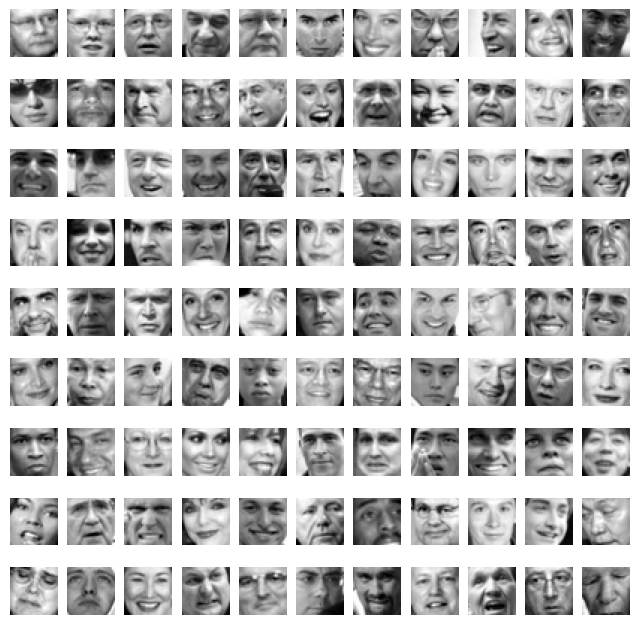

Imagens reconstruídas:


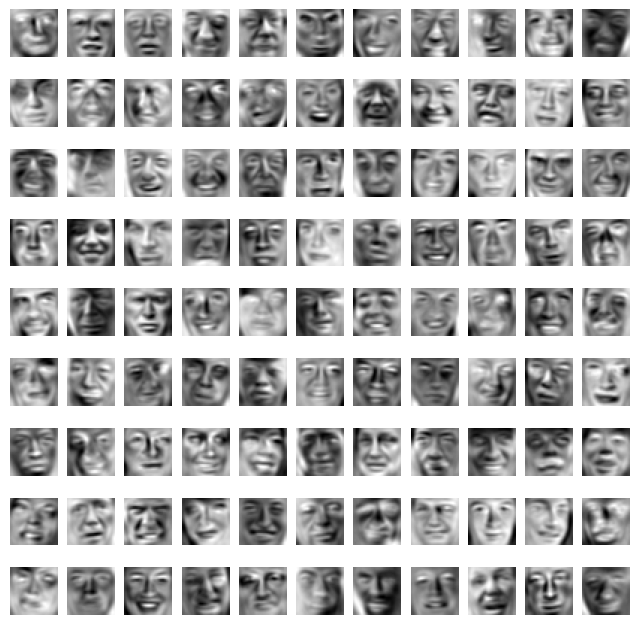

In [24]:
# exibe as imagens originais e as imagens reconstruídas após a aplicação do PCA
K2 = 100
X2_rec  = reconstruirDados(Z2, U2, K2)

print('Imagens originais:')
visualizaImagem(X2[1:100,:])
plt.show()

print('Imagens reconstruídas:')
visualizaImagem(X2_rec[1:100,:])
plt.show()